In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import backtrader as bt

# Download S&P 500 index and its constituents data
sp500_components = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
symbols = sp500_components['Symbol'].tolist()

# Download historical data for the last 6 months
end_date = datetime.now()
start_date = end_date - timedelta(days=180)
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [5]:
three_months = data.pct_change(periods=100).iloc[-1]
one_month = data.pct_change(periods=50).iloc[-1]
two_weeks = data.pct_change(periods=21).iloc[-1]

# Combine into a single DataFrame
performance = pd.DataFrame({
    'Three_Months': three_months,
    'One_Month': one_month,
    'Two_Weeks': two_weeks
})

In [6]:
top_n = 0.1  # Top 10%
top_three_months = performance['Three_Months'].nlargest(int(len(performance)))
top_one_month = performance['One_Month'].nlargest(int(len(performance)))
top_two_weeks = performance['Two_Weeks'].nlargest(int(len(performance)))

In [7]:
combined_performance = (top_three_months + top_one_month + top_two_weeks) / 3
ranked_stocks = combined_performance.nlargest(int(len(performance) * top_n))

In [8]:
# Define a simple strategy
class MomentumStrategy(bt.Strategy):
    def __init__(self):
        self.ranked_stocks = ranked_stocks.index.tolist()
        self.datamap = {d._name: d for d in self.datas}
    
    def next(self):
        for stock in self.ranked_stocks:
            data = self.datamap.get(stock)
            if data and self.getposition(data).size == 0:
                self.buy(data=data, size=100)  # Adjust size as needed

# Create a Cerebro entity
cerebro = bt.Cerebro()
cerebro.addstrategy(MomentumStrategy)

# Add data to Cerebro
for symbol in ranked_stocks.index:
    data = bt.feeds.PandasData(dataname=yf.download(symbol, start=start_date, end=end_date))
    cerebro.adddata(data, name=symbol)

# Run the backtest
#cerebro.run()

# Plot the result
#cerebro.plot()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
ranked_stocks.index[:10]

Index(['NVDA', 'VST', 'FSLR', 'CEG', 'TER', 'MU', 'NTAP', 'TRGP', 'HPE',
       'LLY'],
      dtype='object')

In [10]:
ranked_stocks

NVDA     0.564638
VST      0.463760
FSLR     0.396526
CEG      0.329449
TER      0.324623
MU       0.305044
NTAP     0.279810
TRGP     0.266833
HPE      0.250530
LLY      0.241210
MPWR     0.234766
CRWD     0.234475
NRG      0.226152
AVGO     0.216783
KLAC     0.215965
HPQ      0.215163
ANET     0.212164
AMAT     0.209268
RCL      0.206045
IP       0.203259
IRM      0.197603
GLW      0.196021
DECK     0.189916
HWM      0.186883
BBY      0.181781
QCOM     0.181211
GOOGL    0.180229
APH      0.180109
STX      0.179509
GOOG     0.178205
FICO     0.177378
SMCI     0.175104
CCL      0.173806
CMG      0.173038
ORCL     0.172191
LDOS     0.170635
GE       0.170312
MRNA     0.169802
DVA      0.165967
GDDY     0.162522
RL       0.160040
COST     0.158432
LRCX     0.158351
TT       0.156550
PWR      0.155176
PODD     0.152298
MCK      0.149298
GRMN     0.148978
WDC      0.148517
VRSK     0.147716
dtype: float64

In [11]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import backtrader as bt

In [12]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import backtrader as bt

# Download S&P 500 index and its constituents data
sp500_components = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
symbols = sp500_components['Symbol'].tolist()

# Download historical data for the last 6 months
end_date = datetime.now()
start_date = end_date - timedelta(days=180)
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: $100000.00
Ending Portfolio Value: $101143.00
Net Performance: 1.14%


<IPython.core.display.Javascript object>


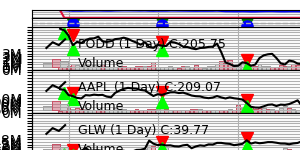

[[<Figure size 640x480 with 22 Axes>]]

In [13]:
three_months = data.pct_change(periods=63).iloc[-1]
one_month = data.pct_change(periods=21).iloc[-1]
two_weeks = data.pct_change(periods=10).iloc[-1]

# Combine into a single DataFrame
performance = pd.DataFrame({
    'Three_Months': three_months,
    'One_Month': one_month,
    'Two_Weeks': two_weeks
})

# Filter top performers (top 10)
top_n = 50
top_three_months = performance['Three_Months'].nlargest(top_n)
top_one_month = performance['One_Month'].nlargest(top_n)
top_two_weeks = performance['Two_Weeks'].nlargest(top_n)

# Combine with equal weights
combined_performance = (top_three_months + top_one_month + top_two_weeks) / 3
ranked_stocks = combined_performance.nlargest(top_n)

# Get the top 10 stocks
top_10_ranked_stocks = ranked_stocks.index[:10].tolist()

# Define a simple strategy
class MomentumStrategy(bt.Strategy):
    def __init__(self):
        self.ranked_stocks = top_10_ranked_stocks
        self.datamap = {d._name: d for d in self.datas}
        self.last_trade_month = None
        self.starting_value = self.broker.getvalue()
    
    def next(self):
        if self.last_trade_month is None or self.data.datetime.date(0).month != self.last_trade_month:
            self.last_trade_month = self.data.datetime.date(0).month
            self.rebalance_portfolio()

    def rebalance_portfolio(self):
        for data in self.datas:
            if self.getposition(data).size > 0:
                self.close(data=data)

        for stock in self.ranked_stocks:
            data = self.datamap.get(stock)
            if data:
                self.buy(data=data, size=100)  # Adjust size as needed

    def stop(self):
        final_value = self.broker.getvalue()
        performance = (final_value - self.starting_value) / self.starting_value * 100
        print(f'Starting Portfolio Value: ${self.starting_value:.2f}')
        print(f'Ending Portfolio Value: ${final_value:.2f}')
        print(f'Net Performance: {performance:.2f}%')

# Create a Cerebro entity
cerebro = bt.Cerebro()
cerebro.addstrategy(MomentumStrategy)

# Add data to Cerebro
for symbol in top_10_ranked_stocks:
    data = bt.feeds.PandasData(dataname=yf.download(symbol, start=start_date, end=end_date))
    cerebro.adddata(data, name=symbol)

# Set initial cash
cerebro.broker.setcash(100000)

# Run the backtest
cerebro.run()

# Plot the result
cerebro.plot()

In [14]:
ranked_stocks

PODD     0.174983
AAPL     0.141679
GLW      0.134941
AVGO     0.133858
TRGP     0.128779
MPWR     0.124989
MU       0.123050
ABBV          NaN
ACN           NaN
ADBE          NaN
ADI           NaN
ADSK          NaN
AES           NaN
AMGN          NaN
ANET          NaN
APH           NaN
AZO           NaN
BBY           NaN
BKNG          NaN
BKR           NaN
BSX           NaN
CCL           NaN
CDNS          NaN
CEG           NaN
CHRW          NaN
CHTR          NaN
CL            NaN
CMG           NaN
COR           NaN
COST          NaN
CRWD          NaN
CVS           NaN
CZR           NaN
DVA           NaN
ESS           NaN
EW            NaN
EXPD          NaN
EXPE          NaN
EXR           NaN
FICO          NaN
FOX           NaN
FOXA          NaN
FSLR          NaN
GDDY          NaN
GE            NaN
GEV           NaN
GILD          NaN
GNRC          NaN
GOOG          NaN
GOOGL         NaN
dtype: float64